In [ ]:
import numpy as np
from numpy import random
import math
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
popSize = 10
maxIteration = 10
totalDistricts = 11

c1 = 0.5
c2 = 1

distanceTable = [[0, 47, 49, 14, 29, 20, 35, 21, 24, 11, 29],
                 [47, 0, 39, 50, 28, 42, 46, 40, 35, 15, 27],
                 [49, 39, 0, 35, 19, 13, 32, 39, 36, 12, 40],
                 [14, 50, 35, 0, 39, 18, 39, 13, 30, 43, 35],
                 [29, 28, 19, 39, 0, 34, 40, 10, 18, 17, 37],
                 [20, 42, 13, 18, 34, 0, 30, 28, 38, 15, 42],
                 [35, 46, 32, 39, 40, 30, 0, 42, 42, 43, 23],
                 [21, 40, 39, 13, 10, 28, 42, 0, 13, 40, 14],
                 [24, 35, 36, 30, 18, 38, 42, 13, 0, 13, 38],
                 [11, 15, 12, 43, 17, 15, 43, 40, 13, 0, 19],
                 [29, 27, 40, 35, 37, 42, 23, 14, 38, 19, 0]]

In [ ]:
def generateRandomTable(totalDistricts):
  randomtable = []
  for i in range(totalDistricts):
    randomarray = []
    for j in range(totalDistricts):
      randomvalue = np.random.randint(10,51)
      if i == j:
        randomvalue = 0
      if i > j:
        randomvalue = randomtable[j][i]
      randomarray.append(randomvalue)
    randomtable.append(randomarray)
  return randomtable

def generatePartikel():
  partikel = []
  listKecamatan = [1,2,3,4,5,6,7,8,9,10,11]
  for i in range(totalDistricts):
    x = np.random.choice(listKecamatan)
    listKecamatan.remove(x)
    partikel.append(x)
  return partikel

def hitungJarakDanFitness(partikel):
  jarak = 0
  partIndex = [i-1 for i in partikel]
  for i in range(1, len(partIndex)):
    jarak += distanceTable[partIndex[i-1]][partIndex[i]]
  jarak += distanceTable[partIndex[len(partIndex)-1]][partIndex[0]]
  fitness = 1 / jarak * 100
  fitness = round(fitness, 3)
  return jarak, fitness

def HDPSO_move(x1, v1):
  v1 = [[i-1 for i in j] for j in v1]
  for i in v1:
    x1[i[0]], x1[i[1]] = x1[i[1]], x1[i[0]]
  return x1

def HDPSO_substraction(x1, x2):
  temp = x2[:]
  v1 = []
  for i in range(len(x1)):
    if x1[i] != temp[i]:
      index = temp.index(x1[i])
      v1.append([i, index])
      temp[i], temp[index] = temp[index], temp[i]
  v1 = [[i+1 for i in j] for j in v1]
  return v1

def HDPSO_addition(x1,x2):
  return x1 + x2

def HDPSO_multiplication(c, v1):
  new_V_len = int(round(c*len(v1)))
  v1 = v1[:new_V_len]
  return v1

In [ ]:
def initiateKecepatan():
  kecepatan = []
  for i in range(popSize):
    kecepatan.append([i, []])
  return kecepatan

def initiatePosisi():
  posisi = []
  for i in range(popSize):
    partikel = generatePartikel()
    jarak, fitness = hitungJarakDanFitness(partikel)
    posisi.append([partikel, jarak, fitness])
  return posisi

def initiatePBest(posisi):
  pbest = posisi[:]
  return pbest

def initiateGBest(pbest):
  gbest = pbest[0]
  for i in pbest:
    if(i[2] > gbest[2]):
      gbest = i[:]
  return gbest

def updateKecepatan(kecepatan, posisi, pBest, gBest):
  # rumus kecepatan: v2 = c1*v1 + c2*((pbest + 0.5*(gbest-pbest))-x1)
  for i in range(popSize):
    v1 = kecepatan[i][1][:]
    x1 = posisi[i][0][:]
    pbest = pBest[i][0][:]
    gbest = gBest[0][:]

    #v2 = HDPSO_addition(HDPSO_multiplication(c1, v1), HDPSO_multiplication(c2, HDPSO_substraction(HDPSO_move(pbest, HDPSO_multiplication(0.5, HDPSO_substraction(gbest, pbest))),x1)))
    a = HDPSO_substraction(gbest, pbest)
    b = HDPSO_multiplication(0.5, a)
    c = HDPSO_move(pbest, b)
    d = HDPSO_substraction(c, x1)
    e = HDPSO_multiplication(c2, d)
    f = HDPSO_multiplication(c1, v1)
    g = HDPSO_addition(f, e)

    kecepatan[i][1] = g[:]
  return kecepatan

def updatePosisi(posisi, kecepatan):
  x1 = [i[0] for i in posisi]
  v1 = [i[1] for i in kecepatan]
  for i in range(popSize):
    posisi[i][0] = HDPSO_move(x1[i], v1[i])[:]
    posisi[i][1], posisi[i][2] = hitungJarakDanFitness(posisi[i][0])
  return posisi

def updatePbest(pbest, posisi):
  for i in range(popSize):
    if posisi[i][2] > pbest[i][2]:
      pbest[i] = posisi[i][:]
  return pbest

def updateGbest(pbest, gbest):
  for i in pbest:
    if i[2] > gbest[2]:
      gbest = i[:]
  return gbest

def cetakOutput(i, kecepatan, posisi, pbest, gbest):
  print('ITERASI : ' + str(i))

  print('kecepatan:')
  print(pd.DataFrame(kecepatan)[[1]])
  print()
    
  print('posisi:')
  print(pd.DataFrame(posisi))
  print()
    
  print('pbest:')
  print(pd.DataFrame(pbest))
  print()
    
  print('gbest:')
  print(gbest)
  print()

In [ ]:
def ShowGraph(data):
  plt.style.use('ggplot')
  plt.subplots(figsize=(12, 6))    
  plt.title('Hasil Tes Konvergen Rata-Rata Fitness')
  plt.xlabel('Total Iterasi')
  plt.ylabel('Rata-Rata Fitness')

  for i in range(len(data)):
    plt.plot(data, label='Trial ke '+str(i))

  plt.legend(loc='lower right')
  plt.show()

ITERASI : 0
kecepatan:
    1
0  []
1  []
2  []
3  []
4  []
5  []
6  []
7  []
8  []
9  []

posisi:
                                     0    1      2
0  [9, 4, 8, 3, 10, 1, 6, 11, 7, 5, 2]  293  0.341
1  [1, 5, 8, 3, 10, 11, 4, 2, 9, 7, 6]  321  0.312
2  [3, 2, 10, 1, 8, 5, 4, 6, 9, 11, 7]  284  0.352
3  [4, 7, 2, 9, 11, 3, 8, 1, 5, 6, 10]  379  0.264
4  [6, 9, 4, 7, 2, 1, 11, 3, 8, 10, 5]  399  0.251
5  [2, 7, 8, 4, 6, 11, 1, 3, 5, 9, 10]  304  0.329
6  [5, 6, 8, 1, 3, 11, 7, 4, 2, 10, 9]  330  0.303
7  [1, 8, 10, 9, 11, 6, 5, 3, 7, 2, 4]  349  0.287
8  [1, 6, 7, 11, 2, 4, 10, 3, 8, 5, 9]  296  0.338
9  [3, 10, 7, 4, 8, 6, 5, 2, 11, 9, 1]  335  0.299

pbest:
                                     0    1      2
0  [9, 4, 8, 3, 10, 1, 6, 11, 7, 5, 2]  293  0.341
1  [1, 5, 8, 3, 10, 11, 4, 2, 9, 7, 6]  321  0.312
2  [3, 2, 10, 1, 8, 5, 4, 6, 9, 11, 7]  284  0.352
3  [4, 7, 2, 9, 11, 3, 8, 1, 5, 6, 10]  379  0.264
4  [6, 9, 4, 7, 2, 1, 11, 3, 8, 10, 5]  399  0.251
5  [2, 7, 8, 4, 6, 11, 1, 3

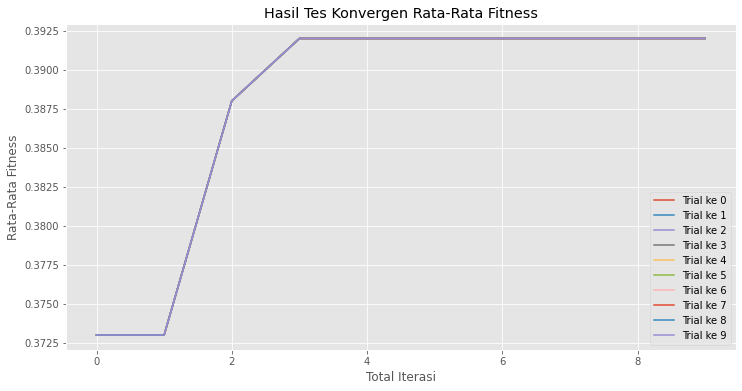

In [ ]:
kecepatan = posisi = pbest = gbest = ''
gbestAllIteration = []

for i in range(maxIteration+1):
  if i == 0:
    kecepatan = initiateKecepatan()[:]
    posisi = initiatePosisi()[:]
    pbest = initiatePBest(posisi)[:]
    gbest = initiateGBest(pbest)[:]
    cetakOutput(i, kecepatan, posisi, pbest, gbest)

  else:
    kecepatan = updateKecepatan(kecepatan, posisi, pbest, gbest)[:]
    posisi = updatePosisi(posisi, kecepatan)[:]
    pbest = updatePbest(pbest, posisi)[:]
    gbest = updateGbest(pbest, gbest)[:]
    cetakOutput(i, kecepatan, posisi, pbest, gbest)

    gbestAllIteration.append(gbest[2])

ShowGraph(gbestAllIteration)